In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [24]:
with open("/data/subjects/nombres_caution.pkl", "rb") as f:
    caution_subjects = pickle.load(f)
print(caution_subjects)

['NDARBF176LPM', 'NDARBV680AA8', 'NDAREJ923AYR', 'NDARFD822TY5', 'NDARGB324PM1', 'NDARGG205WVN', 'NDARGZ038DRL', 'NDARHU211PYD', 'NDARHZ923PAH', 'NDARJD387HWG', 'NDARJG300HWH', 'NDARJG488XHT', 'NDARKE650TFQ', 'NDARLK181GL4', 'NDARMT732GKM', 'NDARMZ200GVD', 'NDARPW635LN4', 'NDARTX795AKR', 'NDARUL250RA6', 'NDARVD635FX8', 'NDARWV449GEM', 'NDARYD195BDH', 'NDARYZ363HP4', 'NDARAP782TVC', 'NDARBG831VK4', 'NDARBJ159HXB', 'NDARBU757VJK', 'NDARCD357CZR', 'NDARCK647MU6', 'NDARCU865PBV', 'NDARDF373ZDW', 'NDARDH934MUV', 'NDARDJ947WXC', 'NDARDM385EK2', 'NDAREM155HGQ', 'NDAREY512KVX', 'NDARGA499CKF', 'NDARGF192VD1', 'NDARGH790CEF', 'NDARGL359WZA', 'NDARGT551AFK', 'NDARHF150FDY', 'NDARJG477THE', 'NDARJH513HZX', 'NDARJM618NZH', 'NDARJP444DZM', 'NDARJV377HG4', 'NDARJY747PRJ', 'NDARKA085YRG', 'NDARKP815KPZ', 'NDARLF142AF5', 'NDARMJ849UKD', 'NDARNP370WGP', 'NDARNU497GTX', 'NDARPA827UBJ', 'NDARRL685WB7', 'NDARRY715CY4', 'NDARTK691PJJ', 'NDARTK834FT9', 'NDARUX284GGB', 'NDARVJ685ZW5', 'NDARWD655AAA', 'NDARWP

# Exploratory Data Analysis

In [12]:
# Configuración estética
sns.set(style="whitegrid", palette="muted", font_scale=1.1)

# Cargar los datos
df = pd.read_csv("/data/subjects/subject_data.csv")

# Vista general
print("Dimensiones:", df.shape)
df.head()

Dimensiones: (2684, 13)


,Unnamed: 0,subject,release_number,sex,age,ehq_total,commercial_use,full_pheno,p_factor,attention,internalizing,externalizing,restingstate
0,0,NDARAC904DMU,R1,F,11.3386,71.17,Yes,Yes,-0.603,-0.446,1.248,0.325,available
1,1,NDARAG143ARJ,R1,M,7.6648,100.05,Yes,Yes,-0.258,-0.425,1.006,0.509,available
2,2,NDARAM704GKZ,R1,M,10.9449,-53.36,Yes,Yes,0.062,-0.119,0.222,0.366,available
3,3,NDARAN385MDH,R1,M,10.7089,96.72,Yes,Yes,0.034,-0.308,0.455,-0.483,available
4,4,NDARAP359UM6,R1,F,12.8422,80.04,Yes,Yes,0.467,1.826,1.949,-0.926,available


In [ ]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,2684.0,NaN,NaN,NaN,1415.467213,804.040404,0.0,735.75,1417.5,2088.25,2879.0
subject,2684,2684,NDARAC904DMU,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
release_number,2684,11,R10,438,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sex,2684,2,M,1756,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,2684.0,NaN,NaN,NaN,10.284601,3.40332,5.036,7.66415,9.625,12.386475,21.9012
ehq_total,2661.0,NaN,NaN,NaN,58.180289,51.605157,-100.05,46.67,80.0,93.38,100.05
commercial_use,2684,1,Yes,2684,NaN,NaN,NaN,NaN,NaN,NaN,NaN
full_pheno,2684,2,Yes,1520,NaN,NaN,NaN,NaN,NaN,NaN,NaN
p_factor,2648.0,NaN,NaN,NaN,0.043515,0.900787,-1.989,-0.592,0.018,0.6755,3.293
attention,2648.0,NaN,NaN,NaN,0.0225,0.808724,-2.451,-0.56825,0.015,0.58825,2.406


Valores nulos por columna:
 p_factor         36
attention        36
internalizing    36
externalizing    36
ehq_total        23
dtype: int64


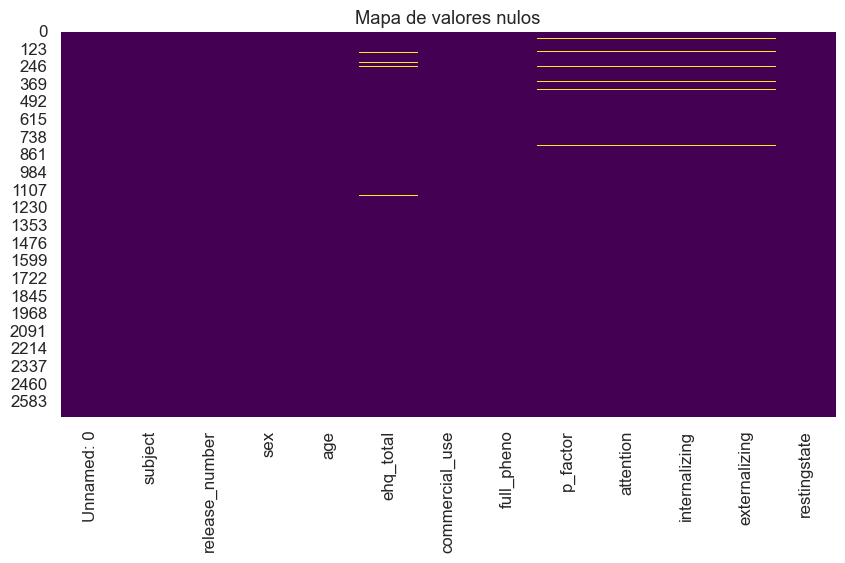

In [15]:
# Valores faltantes
missing = df.isnull().sum().sort_values(ascending=False)
print("Valores nulos por columna:\n", missing[missing > 0])

# Visualización
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Mapa de valores nulos")
plt.show()

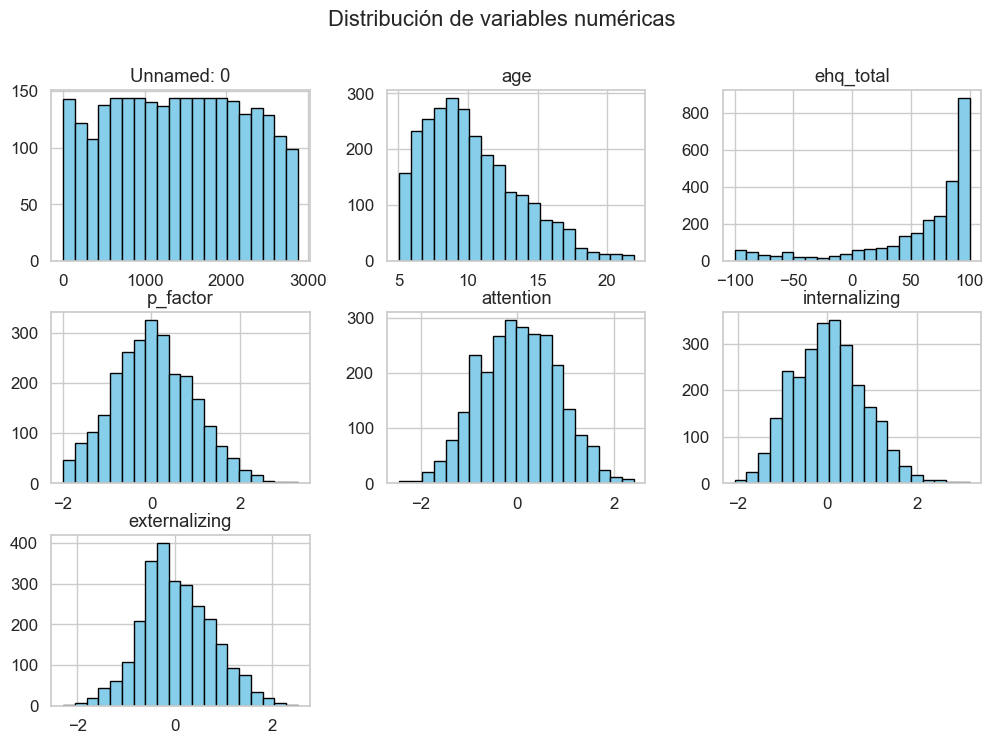

In [16]:
num_cols = df.select_dtypes(include=np.number).columns

df[num_cols].hist(figsize=(12,8), bins=20, color='skyblue', edgecolor='black')
plt.suptitle("Distribución de variables numéricas")
plt.show()

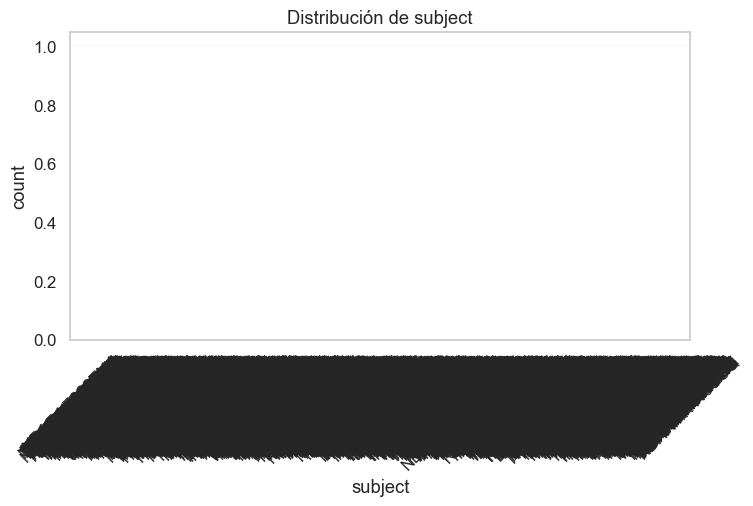

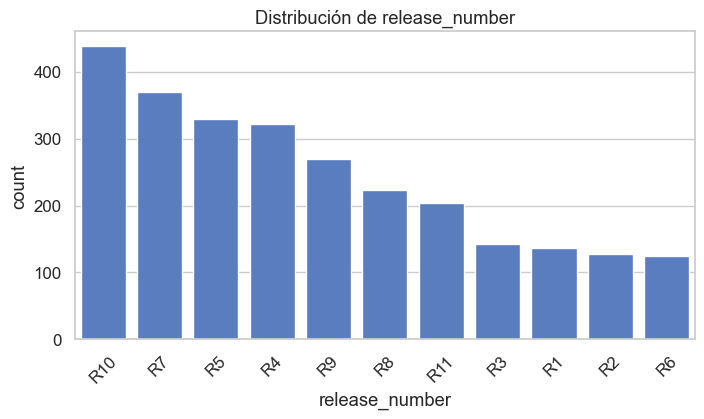

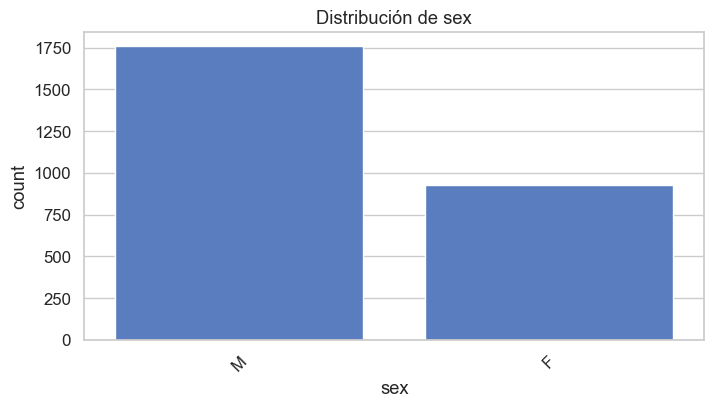

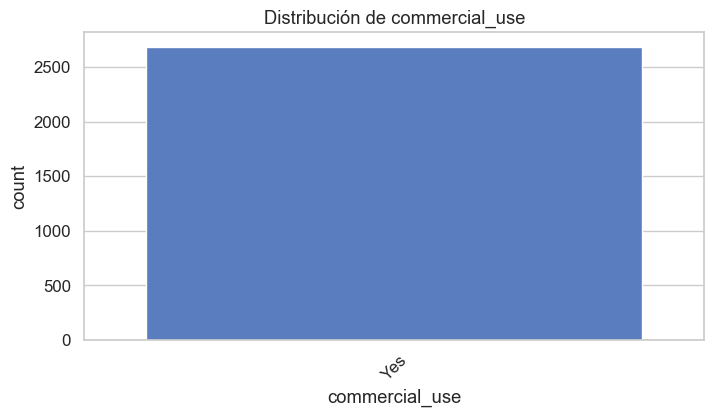

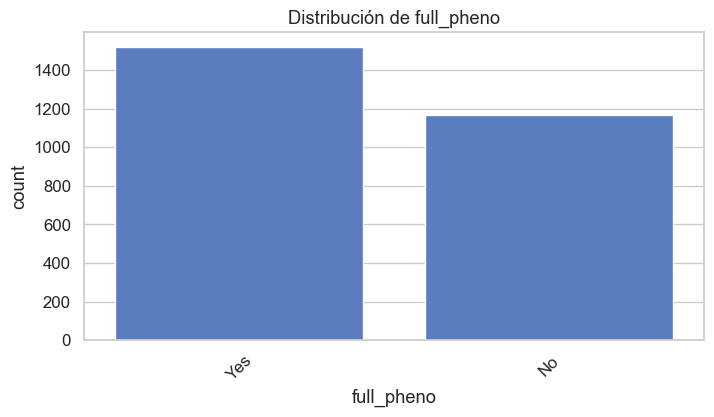

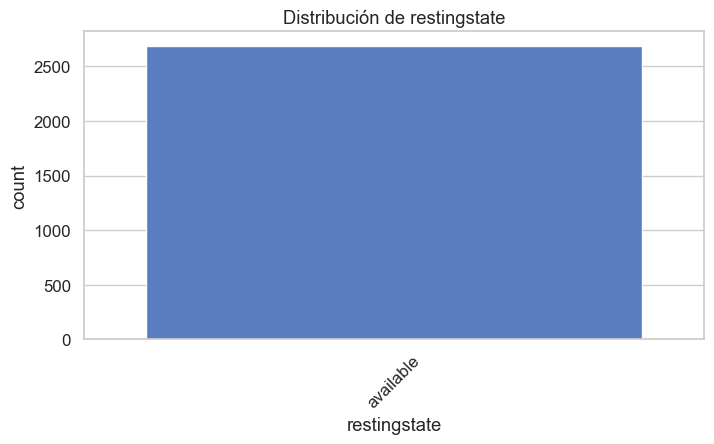

In [17]:
cat_cols = df.select_dtypes(include='object').columns

for col in cat_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f"Distribución de {col}")
    plt.xticks(rotation=45)
    plt.show()

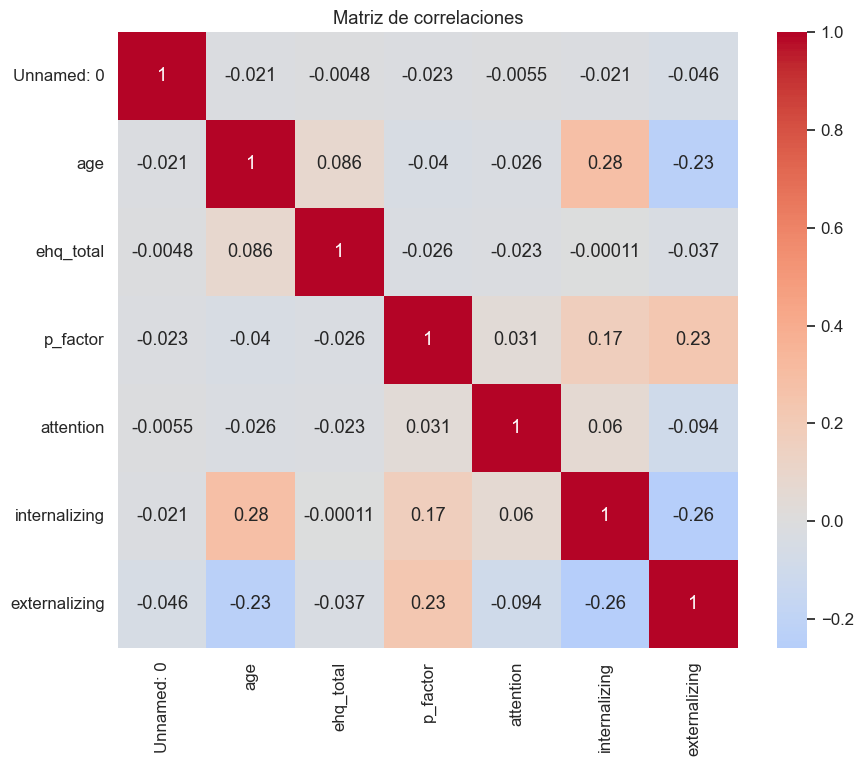

In [18]:
plt.figure(figsize=(10,8))
corr = df[num_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title("Matriz de correlaciones")
plt.show()

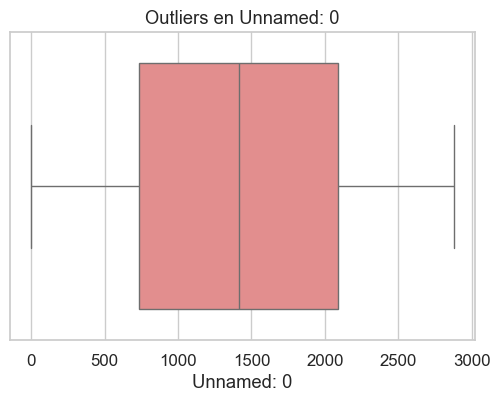

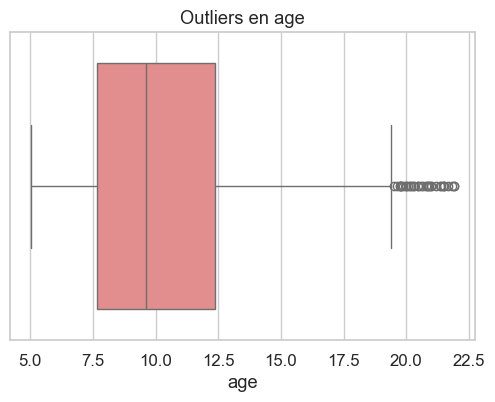

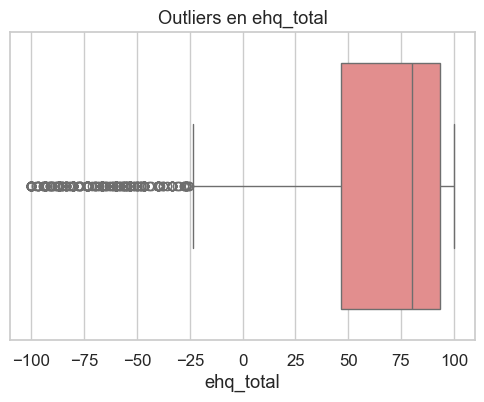

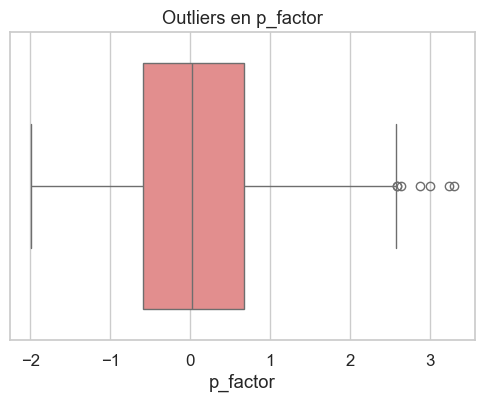

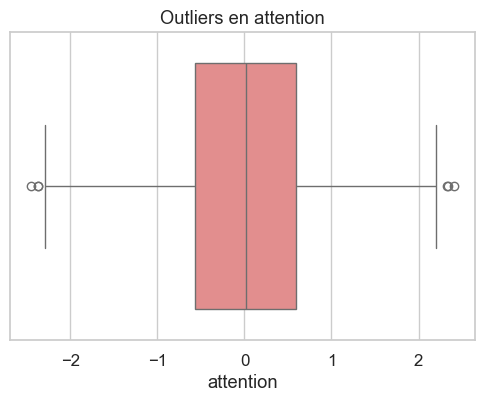

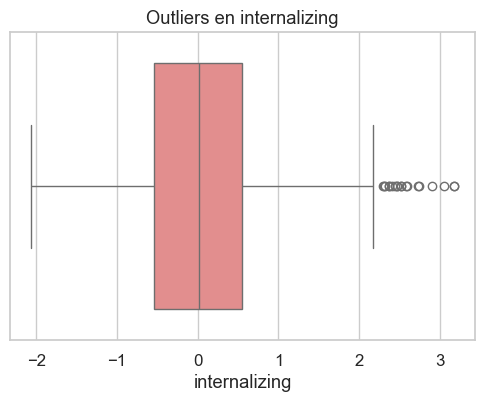

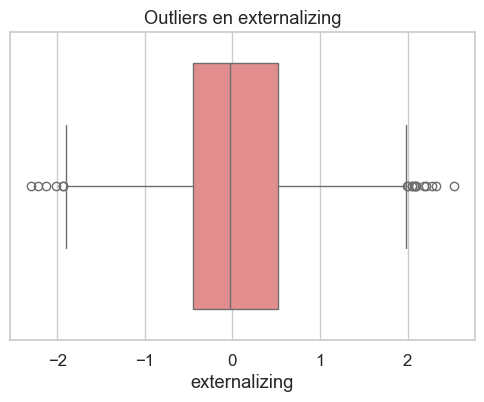

In [19]:
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col], color='lightcoral')
    plt.title(f"Outliers en {col}")
    plt.show()

In [21]:
print("Total de filas:", df.shape[0])
print("Total de columnas:", df.shape[1])
print("Variables numéricas:", len(num_cols))
print("Variables categóricas:", len(cat_cols))
print("Duplicados:", df.duplicated().sum())

Total de filas: 2684
Total de columnas: 13
Variables numéricas: 7
Variables categóricas: 6
Duplicados: 0


# Variables Demograficas

## Edad

In [95]:
age = df['age']

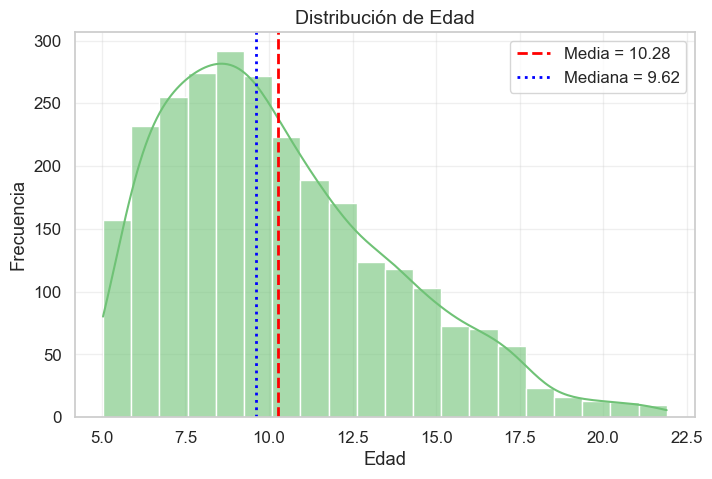

In [104]:
plt.figure(figsize=(8, 5))
sns.histplot(df['age'], bins=20, kde=True, color='#6fc276', alpha=0.6)

# Calcular media y mediana
mean_value = df['age'].mean()
median_value = df['age'].median()

# Agregar líneas verticales
plt.axvline(mean_value, color='red', linestyle='--', linewidth=2, label=f'Media = {mean_value:.2f}')
plt.axvline(median_value, color='blue', linestyle=':', linewidth=2, label=f'Mediana = {median_value:.2f}')

# Etiquetas y título
plt.title('Distribución de Edad', fontsize=14)
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [105]:
# Cálculos básicos
min_value = df['age'].min()
max_value = df['age'].max()
mean_value = df['age'].mean()
median_value = df['age'].median()
std_value = df['age'].std()
var_value = df['age'].var()
range_value = max_value - min_value

# Mostrar resultados
print(f"Mínimo: {min_value:.3f}")
print(f"Máximo: {max_value:.3f}")
print(f"Rango: {range_value:.3f}")
print(f"Media: {mean_value:.3f}")
print(f"Mediana: {median_value:.3f}")
print(f"Desviación estándar: {std_value:.3f}")
print(f"Varianza: {var_value:.3f}")

Mínimo: 5.036
Máximo: 21.901
Rango: 16.865
Media: 10.285
Mediana: 9.625
Desviación estándar: 3.403
Varianza: 11.583


## Genero

In [85]:
sex = df['sex']

/var/folders/vf/c96_ylv95bb3bbx3575v7_xr0000gn/T/ipykernel_14410/1493518829.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sex', data=df, palette='pastel')


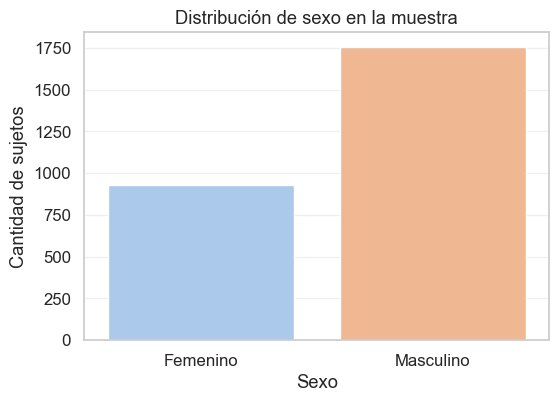

In [107]:
plt.figure(figsize=(6,4))
sns.countplot(x='sex', data=df, palette='pastel')

plt.title('Distribución de sexo en la muestra')
plt.xlabel('Sexo')
plt.ylabel('Cantidad de sujetos')
plt.xticks(ticks=[0, 1], labels=['Femenino', 'Masculino'])
plt.grid(axis='y', alpha=0.3)
plt.show()

/var/folders/vf/c96_ylv95bb3bbx3575v7_xr0000gn/T/ipykernel_14410/3876056847.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=df['sex'].replace({'M': 'Masculino', 'F': 'Femenino'}), palette='pastel')


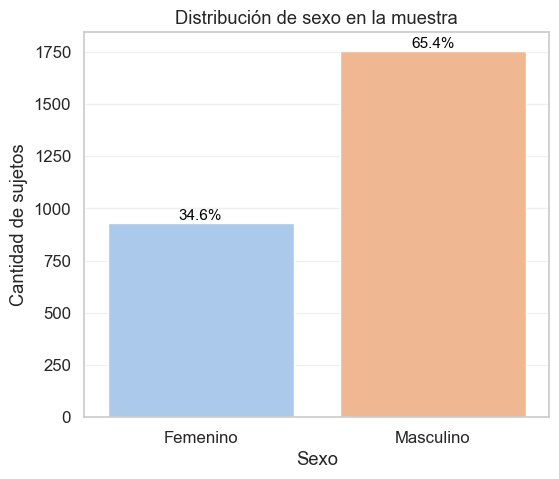

In [114]:
plt.figure(figsize=(6,5))
ax = sns.countplot(x=df['sex'].replace({'M': 'Masculino', 'F': 'Femenino'}), palette='pastel')

# Título y etiquetas
plt.title('Distribución de sexo en la muestra')
plt.xlabel('Sexo')
plt.ylabel('Cantidad de sujetos')
plt.grid(axis='y', alpha=0.3)

# Calcular porcentajes
total = len(df)
for p in ax.patches:
    height = p.get_height()
    percentage = 100 * height / total
    ax.text(p.get_x() + p.get_width() / 2,
            height + 15,                        # posición sobre la barra
            f'{percentage:.1f}%',               # formato de porcentaje
            ha='center', fontsize=11, color='black')

plt.show()

# P-Factor

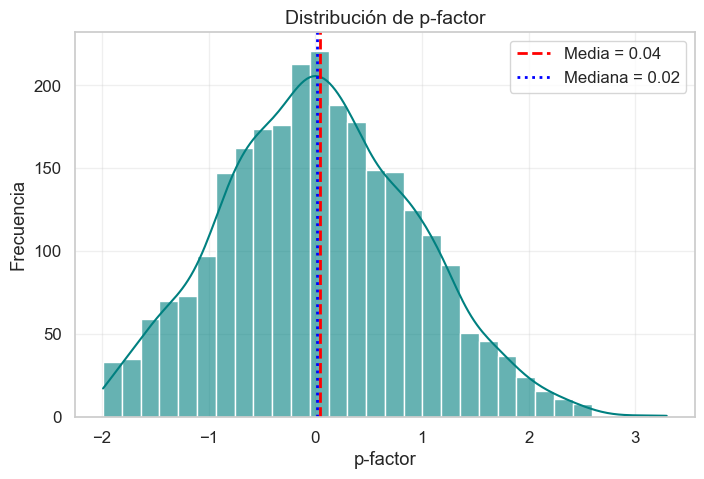

In [43]:
plt.figure(figsize=(8, 5))
sns.histplot(df['p_factor'], bins=30, kde=True, color='teal', alpha=0.6)

# Calcular media y mediana
mean_value = df['p_factor'].mean()
median_value = df['p_factor'].median()

# Agregar líneas verticales
plt.axvline(mean_value, color='red', linestyle='--', linewidth=2, label=f'Media = {mean_value:.2f}')
plt.axvline(median_value, color='blue', linestyle=':', linewidth=2, label=f'Mediana = {median_value:.2f}')

# Etiquetas y título
plt.title('Distribución de p-factor', fontsize=14)
plt.xlabel('p-factor')
plt.ylabel('Frecuencia')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [34]:
# Cálculos básicos
min_value = df['p_factor'].min()
max_value = df['p_factor'].max()
mean_value = df['p_factor'].mean()
median_value = df['p_factor'].median()
std_value = df['p_factor'].std()
var_value = df['p_factor'].var()
range_value = max_value - min_value

# Mostrar resultados
print(f"Mínimo: {min_value:.3f}")
print(f"Máximo: {max_value:.3f}")
print(f"Rango: {range_value:.3f}")
print(f"Media: {mean_value:.3f}")
print(f"Mediana: {median_value:.3f}")
print(f"Desviación estándar: {std_value:.3f}")
print(f"Varianza: {var_value:.3f}")

Mínimo: -1.989
Máximo: 3.293
Rango: 5.282
Media: 0.044
Mediana: 0.018
Desviación estándar: 0.901
Varianza: 0.811


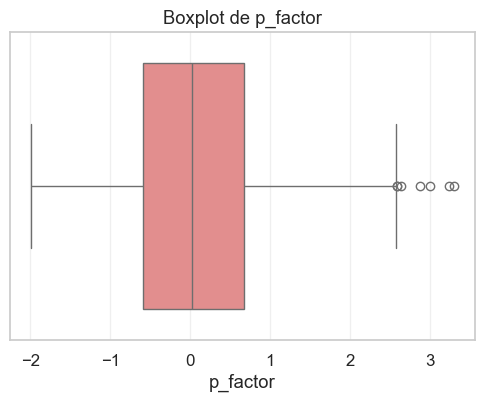

In [44]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['p_factor'], color='lightcoral')
plt.title('Boxplot de p_factor')
plt.xlabel('p_factor')
plt.grid(True, axis='x', alpha=0.3)
plt.show()

## Categorizando sujetos segun p-factor

## Segmentacion por z-scores

In [37]:
# Contar por rangos manualmente
count_le_1 = (df['p_factor'] <= 1).sum()
count_1_2 = ((df['p_factor'] > 1) & (df['p_factor'] < 2)).sum()
count_ge_2 = (df['p_factor'] >= 2).sum()

print(f"≤ 1: {count_le_1}")
print(f"> 1 y < 2: {count_1_2}")
print(f"≥ 2: {count_ge_2}")

≤ 1: 2245
> 1 y < 2: 357
≥ 2: 46


In [39]:
# Definir los intervalos
bins = [-float('inf'), 1, 2, float('inf')]
labels = ['≤ 1', '1 < x < 2', '≥ 2']

df['p_factor_group'] = pd.cut(df['p_factor'], bins=bins, labels=labels)

# Contar por grupo
counts = df['p_factor_group'].value_counts().sort_index()
print(counts)

p_factor_group
≤ 1          2245
1 < x < 2     357
≥ 2            46
Name: count, dtype: int64


/var/folders/vf/c96_ylv95bb3bbx3575v7_xr0000gn/T/ipykernel_14410/2448881057.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='p_factor_group', palette='pastel')


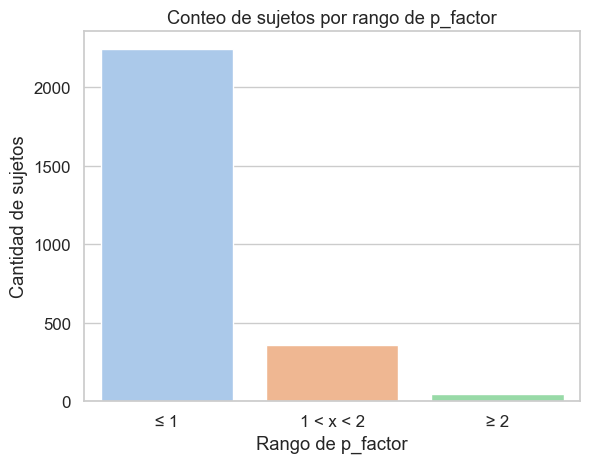

In [40]:
sns.countplot(data=df, x='p_factor_group', palette='pastel')
plt.title('Conteo de sujetos por rango de p_factor')
plt.xlabel('Rango de p_factor')
plt.ylabel('Cantidad de sujetos')
plt.show()

## Segmentacion por media y desviacion estandar muestral

In [80]:
# Calcular media y desviación estándar
mean_value = df['p_factor'].mean()
std_value = df['p_factor'].std()

# Definir los límites
lim_inf = mean_value
lim_sup = mean_value + std_value

# Clasificar según los umbrales
bins = [-float('inf'), lim_inf, lim_sup, float('inf')]
labels = [f'≤ {mean_value:.2f}',
          f'{mean_value:.2f} - {lim_sup:.2f}',
          f'> {lim_sup:.2f}']

df['p_factor_segment'] = pd.cut(df['p_factor'], bins=bins, labels=labels)

# Contar sujetos por grupo
counts = df['p_factor_segment'].value_counts().sort_index()
percentages = (counts / len(df) * 100).round(2)

# Mostrar resultados
print("Conteo por grupo:")
print(counts)
print("\nPorcentaje por grupo:")
print(percentages)

Conteo por grupo:
p_factor_segment
≤ 0.04         1357
0.04 - 0.94     855
> 0.94          436
Name: count, dtype: int64

Porcentaje por grupo:
p_factor_segment
≤ 0.04         50.56
0.04 - 0.94    31.86
> 0.94         16.24
Name: count, dtype: float64


/var/folders/vf/c96_ylv95bb3bbx3575v7_xr0000gn/T/ipykernel_14410/4036534397.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, palette='viridis')


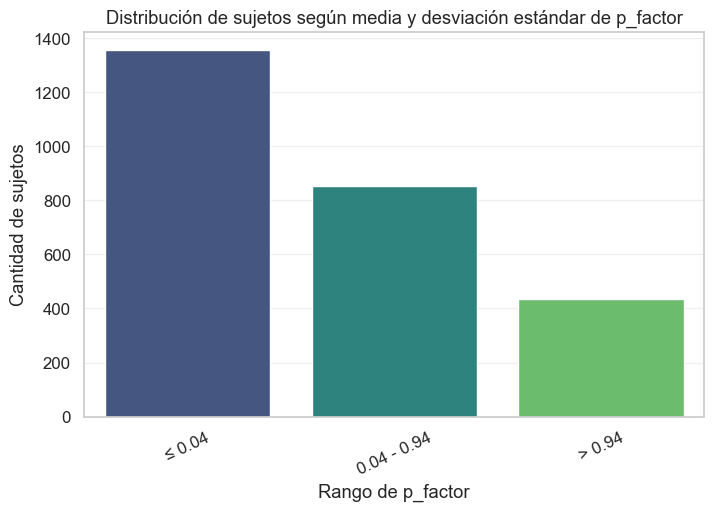

In [81]:
plt.figure(figsize=(8,5))
sns.barplot(x=counts.index, y=counts.values, palette='viridis')
plt.title('Distribución de sujetos según media y desviación estándar de p_factor')
plt.xlabel('Rango de p_factor')
plt.ylabel('Cantidad de sujetos')
plt.xticks(rotation=25)
plt.grid(True, axis='y', alpha=0.3)
plt.show()

### Test Normalidad

In [46]:
from scipy.stats import shapiro


In [52]:
df['p_factor'].isna().sum()  # verifica cuántos NaN hay

np.int64(36)

In [57]:
np.isinf(df['p_factor']).sum()

np.int64(0)

In [69]:
data = df['p_factor'].dropna()

In [58]:
stat, p_value = shapiro(data)
print(f"Estadístico de Shapiro–Wilk: {stat:.4f}")
print(f"Valor p: {p_value:.4f}")

if p_value > 0.05:
    print("No se rechaza la hipótesis nula → la muestra podría ser normal.")
else:
    print("Se rechaza la hipótesis nula → la muestra no es normal.")

Estadístico de Shapiro–Wilk: 0.9953
Valor p: 0.0000
Se rechaza la hipótesis nula → la muestra no es normal.


In [48]:
stat, p_value = shapiro(df['p_factor'])
stat

np.float64(nan)

In [62]:
from scipy.stats import kstest, norm

stat, p_value = kstest(data, 'norm', args=(df['p_factor'].mean(), df['p_factor'].std()))
print(f"Estadístico de KS: {stat:.4f}")
print(f"Valor p: {p_value:.4f}")

if p_value > 0.05:
    print("No se rechaza H0 → distribución aproximadamente normal.")
else:
    print("Se rechaza H0 → distribución no normal.")

Estadístico de KS: 0.0179
Valor p: 0.3603
No se rechaza H0 → distribución aproximadamente normal.


In [64]:
from scipy.stats import normaltest

stat, p_value = normaltest(data)
print(f"Estadístico de D’Agostino–Pearson: {stat:.4f}")
print(f"Valor p: {p_value:.4f}")

if p_value > 0.05:
    print("No se rechaza H0 → la muestra podría seguir una distribución normal.")
else:
    print("Se rechaza H0 → la muestra no es normal.")

Estadístico de D’Agostino–Pearson: 21.4802
Valor p: 0.0000
Se rechaza H0 → la muestra no es normal.


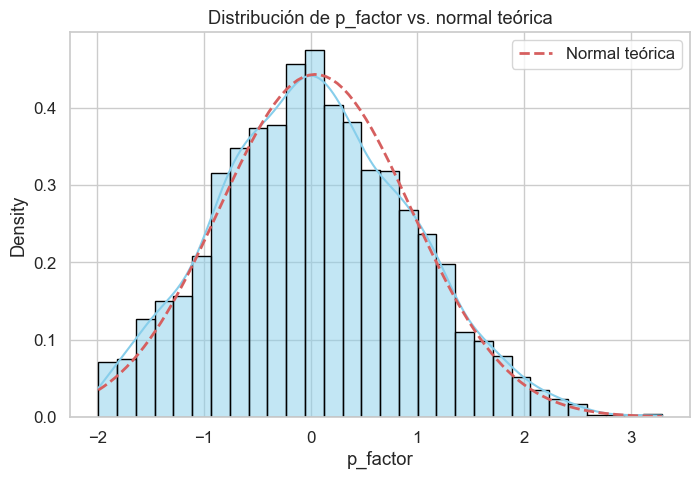

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(8,5))
sns.histplot(df['p_factor'], bins=30, kde=True, stat='density', color='skyblue', edgecolor='black')
x = np.linspace(df['p_factor'].min(), df['p_factor'].max(), 100)
plt.plot(x, norm.pdf(x, df['p_factor'].mean(), df['p_factor'].std()), 'r--', linewidth=2, label='Normal teórica')
plt.title('Distribución de p_factor vs. normal teórica')
plt.legend()
plt.show()

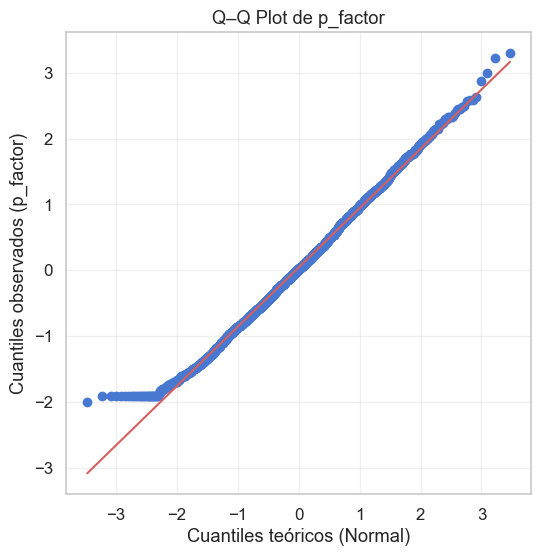

In [65]:
import scipy.stats as stats
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
stats.probplot(df['p_factor'].dropna(), dist="norm", plot=plt)
plt.title("Q–Q Plot de p_factor")
plt.xlabel("Cuantiles teóricos (Normal)")
plt.ylabel("Cuantiles observados (p_factor)")
plt.grid(True, alpha=0.3)
plt.show()

In [75]:
from sklearn.preprocessing import PowerTransformer
import numpy as np

# Crear copia sin NaN
data = df['p_factor'].dropna().values.reshape(-1, 1)

# Aplicar transformación Yeo-Johnson (permite valores negativos)
pt = PowerTransformer(method='yeo-johnson')
p_factor_transformed = pt.fit_transform(data).flatten()

# Asignar a nuevo DataFrame (solo filas válidas)
df.loc[df['p_factor'].notna(), 'p_factor_yeojohnson'] = p_factor_transformed

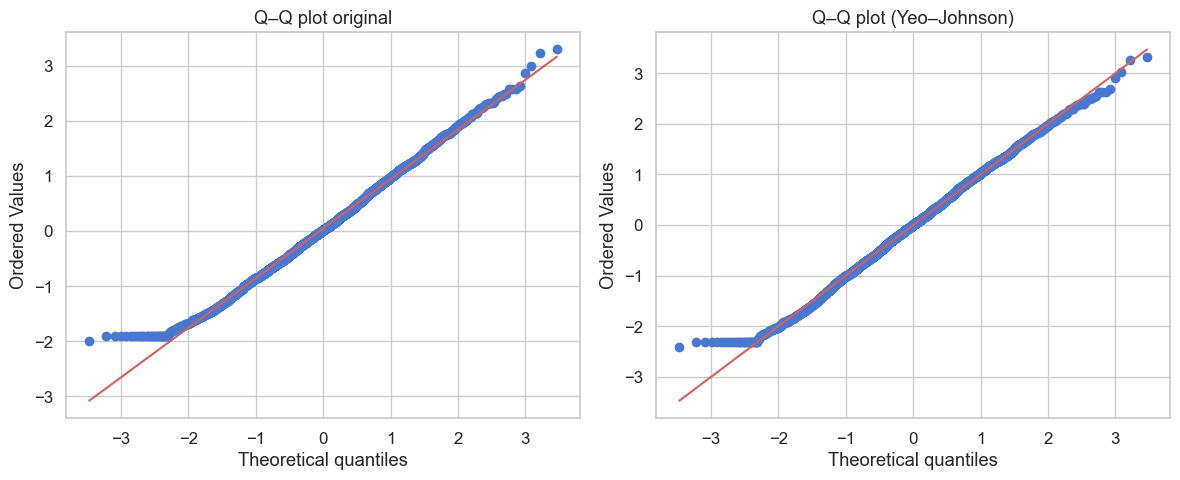

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Original
stats.probplot(df['p_factor'].dropna(), dist="norm", plot=axes[0])
axes[0].set_title("Q–Q plot original")

# Transformado
stats.probplot(df['p_factor_yeojohnson'].dropna(), dist="norm", plot=axes[1])
axes[1].set_title("Q–Q plot (Yeo–Johnson)")

plt.tight_layout()
plt.show()

In [77]:
from scipy.stats import skew, kurtosis

original = df['p_factor'].dropna()
transformed = df['p_factor_yeojohnson'].dropna()

print("Asimetría (original):", skew(original))
print("Asimetría (Yeo–Johnson):", skew(transformed))
print("Curtosis (original):", kurtosis(original))
print("Curtosis (Yeo–Johnson):", kurtosis(transformed))

Asimetría (original): 0.181127190651486
Asimetría (Yeo–Johnson): 0.011552462398671751
Curtosis (original): -0.23003062150861808
Curtosis (Yeo–Johnson): -0.31024820599858227


In [79]:
stat, p_value = shapiro(transformed)
print(f"Estadístico de Shapiro–Wilk: {stat:.4f}")
print(f"Valor p: {p_value:.4f}")

if p_value > 0.05:
    print("No se rechaza la hipótesis nula → la muestra podría ser normal.")
else:
    print("Se rechaza la hipótesis nula → la muestra no es normal.")

Estadístico de Shapiro–Wilk: 0.9969
Valor p: 0.0000
Se rechaza la hipótesis nula → la muestra no es normal.
